### 第二十四組 : PTT 三峽車禍事件情緒分析

M13B020007   陳學蒨

M134020039   顏淳如

Building prefix dict from c:\Users\User\Downloads\中山\資管所\課程\社群媒體分析\期末報告\week3\dict\dict.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u5b444bc8ecbf5daf1c8560c9893c8341.cache
Loading model cost 0.407 seconds.
Prefix dict has been built successfully.


三峽車禍詞頻統計
     詞語  出現次數
0    車禍   713
1    三峽   633
2    駕駛   474
3    發生   356
4    完整   320
5    肇事   267
6    老翁   245
7    醫院   233
8    重大   227
9    北市   226
10   高齡   225
11   媒體   224
12   78   220
13   家屬   216
14   事故   213
15   12   204
16   學生   199
17   造成   195
18   開車   194
19   19   188
20   新北   188
21   交通   187
22   北大   174
23  三峽區   164
24   國小   162
25   行人   162
26   余姓   162
27   現場   153
28   下午   150
29   備註   149


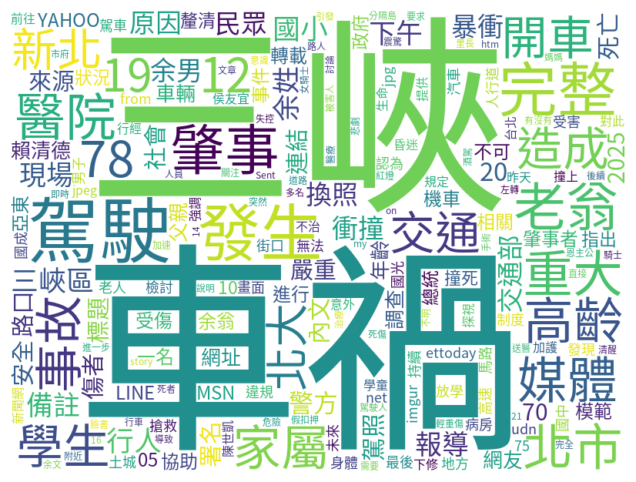

In [ ]:
import pandas as pd
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取使用者提供的最新 CSV 檔案
csv_path = "sna2025s_4_e7dcaf3255_22.csv"
df = pd.read_csv(csv_path)

# 僅使用「內文」欄位，並過濾含「三峽」與「車禍」的文章
df_filtered = df[df["artContent"].str.contains("三峽") & df["artContent"].str.contains("車禍")]

# 載入停用詞與自訂詞典
with open("dict/stopwords.txt", encoding="utf-8") as f:
    stopwords = set(line.strip() for line in f if line.strip())

jieba.set_dictionary("dict/dict.txt")
jieba.load_userdict("dict/user_dict.txt")

# 對文章內文進行斷詞與過濾
all_tokens = []
for text in df_filtered["artContent"]:
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and len(w) > 1]
    all_tokens.extend(words)

# 詞頻統計
counter = Counter(all_tokens)
top_words = counter.most_common(30)
df_top_words = pd.DataFrame(top_words, columns=["詞語", "出現次數"])

# 顯示前 30 詞頻
print("三峽車禍詞頻統計")
print(df_top_words)

# 詞雲圖
wc = WordCloud(
    font_path="dict/SourceHanSansTW-Regular.otf",
    background_color="white",
    width=800,
    height=600
).generate_from_frequencies(counter)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [18]:
# --- 主題建模：gensim ---
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis

# 準備斷詞文件（list of list of words）
tokenized_docs = []
for text in df_filtered["artContent"]:
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and len(w) > 1]
    tokenized_docs.append(words)

# 建立 LDA 模型
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# 顯示主題內容（前10詞）
for idx, topic in lda_model.print_topics(num_topics=5, num_words=10):
    print(f"主題 {idx+1}: {topic}")

# pyLDAvis 主題視覺化
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


主題 1: 0.015*"駕駛" + 0.011*"高齡" + 0.009*"車禍" + 0.008*"換照" + 0.008*"三峽" + 0.008*"交通部" + 0.006*"交通" + 0.006*"事故" + 0.006*"年齡" + 0.006*"70"
主題 2: 0.012*"三峽" + 0.010*"車禍" + 0.008*"完整" + 0.008*"學生" + 0.007*"醫院" + 0.007*"現場" + 0.007*"發生" + 0.006*"老翁" + 0.005*"媒體" + 0.005*"北市"
主題 3: 0.004*"天堂" + 0.003*"身體" + 0.003*"老翁" + 0.003*"余翁" + 0.002*"賴清德" + 0.002*"車禍" + 0.002*"詐騙" + 0.002*"蕭美琴" + 0.002*"廣告" + 0.002*"海狗"
主題 4: 0.017*"車禍" + 0.014*"三峽" + 0.010*"駕駛" + 0.008*"肇事" + 0.008*"發生" + 0.006*"老翁" + 0.006*"78" + 0.006*"開車" + 0.005*"完整" + 0.005*"余男"
主題 5: 0.012*"家屬" + 0.011*"車禍" + 0.010*"三峽" + 0.009*"醫院" + 0.007*"新北" + 0.006*"學生" + 0.005*"完整" + 0.005*"北市" + 0.005*"傷者" + 0.005*"侯友宜"


In [21]:
from gensim import corpora, models
import pyLDAvis.gensim_models
import pyLDAvis
from IPython.display import display
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


# 將先前過濾好的資料斷詞（已完成斷詞的部分使用 all_tokens 統計詞頻）
# 這邊要建立 tokenized_docs（List of List），一篇文章為一個詞袋
tokenized_docs = []
for text in df_filtered["artContent"]:
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and len(w) > 1]
    tokenized_docs.append(words)

# 建立詞典與語料庫
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# 建立 LDA 模型
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=10)

# 印出每個主題的 Top 詞彙
topics_output = []
for idx, topic in lda_model.print_topics(num_topics=5, num_words=10):
    topics_output.append(f"主題 {idx + 1}：{topic}")

# pyLDAvis 視覺化（Jupyter Notebook 中顯示）
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# 輸出主題內容與視覺化資料
topics_output, vis_data

# 顯示主題內容
for topic in topics_output:
    print(topic)
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)



主題 1：0.015*"駕駛" + 0.011*"高齡" + 0.009*"車禍" + 0.008*"換照" + 0.008*"三峽" + 0.008*"交通部" + 0.006*"交通" + 0.006*"事故" + 0.006*"年齡" + 0.006*"70"
主題 2：0.012*"三峽" + 0.010*"車禍" + 0.008*"完整" + 0.008*"學生" + 0.007*"醫院" + 0.007*"現場" + 0.007*"發生" + 0.006*"老翁" + 0.005*"媒體" + 0.005*"北市"
主題 3：0.004*"天堂" + 0.003*"身體" + 0.003*"老翁" + 0.003*"余翁" + 0.002*"賴清德" + 0.002*"車禍" + 0.002*"詐騙" + 0.002*"蕭美琴" + 0.002*"廣告" + 0.002*"海狗"
主題 4：0.017*"車禍" + 0.014*"三峽" + 0.010*"駕駛" + 0.008*"肇事" + 0.008*"發生" + 0.006*"老翁" + 0.006*"78" + 0.006*"開車" + 0.005*"完整" + 0.005*"余男"
主題 5：0.012*"家屬" + 0.011*"車禍" + 0.010*"三峽" + 0.009*"醫院" + 0.007*"新北" + 0.006*"學生" + 0.005*"完整" + 0.005*"北市" + 0.005*"傷者" + 0.005*"侯友宜"
